1. Tổng quan dữ liệu
a. Có bao nhiêu dòng và bao nhiêu cột trong bộ dữ liệu?
b. Có bao nhiêu giá trị bị thiếu trong mỗi cột?
c. Các kiểu dữ liệu của từng cột là gì?

2. Phân phối dữ liệu
a. Loại trang phục nào phổ biến nhất trong tập dữ liệu?
b. Phong cách thời trang nào đang có độ phổ biến cao nhất?
c. Xu hướng thời trang nào có điểm phổ biến (popularity_score) trung bình cao nhất?
d. Màu sắc nào xuất hiện nhiều nhất trong các xu hướng thời trang?
e. Chất liệu vải nào được sử dụng phổ biến nhất?
f. Phân phối giá trị trong cột popularity_score có dạng như thế nào (bị lệch về một phía hay phân phối đều)?

3. Mối quan hệ giữa các yếu tố
a. Xu hướng thời trang có khác nhau theo từng mùa không? (Ví dụ: Mùa hè thường có phong cách nào phổ biến nhất?)
b. Phong cách thời trang nào thường xuất hiện với mức giá cao cấp (high-end) nhất?
c. Các thương hiệu có ảnh hưởng (brand_influence) tác động như thế nào đến độ phổ biến?
d. Những nền tảng mạng xã hội nào đang ảnh hưởng mạnh đến xu hướng thời trang?
e. Có sự khác biệt nào giữa các màu sắc được ưa chuộng theo từng phong cách thời trang không?

4. Phân tích nâng cao
a. Có xu hướng nào nổi bật trên nhiều nền tảng mạng xã hội cùng lúc không?
b. Những chất liệu vải nào thường gắn liền với các phong cách cụ thể?
c. Có mối tương quan nào giữa popularity_score và brand_influence không?
d. Xu hướng thời trang có bị ảnh hưởng bởi season (mùa) không?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

1. Tổng quan dữ liệu

In [ ]:
file = "data-150325.csv"
df = pd.read_csv(file)

df_info = df.info
df_head = df.head

types = df.dtypes
names = df.columns.tolist()

null = df.isnull().sum()
duplicate = df.duplicated().sum()

FileNotFoundError: [Errno 2] No such file or directory: 'data-150325.csv'

In [ ]:
df_info, df_head

(<bound method DataFrame.info of      trend_id category       style  popularity_score  season color_palette  \
 0       T0001    Dress      Casual                82  Autumn        Pastel   
 1       T0002    Dress     Vintage                22  Spring          Neon   
 2       T0003    Shirt  Minimalist                 1  Autumn      Gradient   
 3       T0004    Shirt    Bohemian                18  Summer        Pastel   
 4       T0005    Shirt  Minimalist                98  Spring          Neon   
 ...       ...      ...         ...               ...     ...           ...   
 1995    T1996    Shirt  Minimalist                62  Autumn          Neon   
 1996    T1997    Shirt     Vintage                97  Summer      Metallic   
 1997    T1998    Shoes  Minimalist                61  Winter          Neon   
 1998    T1999    Pants      Sporty                87  Autumn    Earth-tone   
 1999    T2000    Shirt      Casual                19  Spring      Gradient   
 
      fabric_type 

a. Có bao nhiêu dòng và bao nhiêu cột trong bộ dữ liệu?
-> Có 2000 dòng và 10 cột trong bộ dữ liệu.

In [ ]:
null, duplicate

(trend_id              0
 category              0
 style                 0
 popularity_score      0
 season                0
 color_palette         0
 fabric_type           0
 price_range           0
 brand_influence       0
 social_media_trend    0
 dtype: int64,
 np.int64(0))

b. Có bao nhiêu giá trị bị thiếu trong mỗi cột?
-> Không có giá trị bị thiếu trong mỗi cột.

In [ ]:
types, names

(trend_id              object
 category              object
 style                 object
 popularity_score       int64
 season                object
 color_palette         object
 fabric_type           object
 price_range           object
 brand_influence       object
 social_media_trend    object
 dtype: object,
 ['trend_id',
  'category',
  'style',
  'popularity_score',
  'season',
  'color_palette',
  'fabric_type',
  'price_range',
  'brand_influence',
  'social_media_trend'])

c. Các kiểu dữ liệu của từng cột là gì?
-> Cột popularity_score là kiểu int64, còn lại là object.

2. Phân phối dữ liệu

In [ ]:
category_count = df.groupby("category").count()
category_count

,trend_id,style,popularity_score,season,color_palette,fabric_type,price_range,brand_influence,social_media_trend
category,,,,,,,,,
Accessories,385,385,385,385,385,385,385,385,385
Dress,384,384,384,384,384,384,384,384,384
Pants,438,438,438,438,438,438,438,438,438
Shirt,378,378,378,378,378,378,378,378,378
Shoes,415,415,415,415,415,415,415,415,415


a. Loại trang phục nào phổ biến nhất trong tập dữ liệu?
-> Loại trang phục phổ biến nhất trong tập dữ liệu là pants.

In [ ]:
style_count = df.groupby("style").count()
style_count

,trend_id,category,popularity_score,season,color_palette,fabric_type,price_range,brand_influence,social_media_trend
style,,,,,,,,,
Bohemian,293,293,293,293,293,293,293,293,293
Casual,288,288,288,288,288,288,288,288,288
Formal,293,293,293,293,293,293,293,293,293
Minimalist,279,279,279,279,279,279,279,279,279
Sporty,279,279,279,279,279,279,279,279,279
Streetwear,272,272,272,272,272,272,272,272,272
Vintage,296,296,296,296,296,296,296,296,296


b. Phong cách thời trang nào đang có độ phổ biến cao nhất?
-> Phong cách thời trang đang có độ phổ biến cao nhất là vintage.

In [ ]:
popular_style = round(df.groupby("style")["popularity_score"].mean().sort_values(ascending=False), 2)
popular_style

style
Minimalist    52.57
Sporty        51.19
Formal        50.01
Streetwear    49.49
Vintage       48.94
Bohemian      48.46
Casual        47.82
Name: popularity_score, dtype: float64

c. Xu hướng thời trang nào có điểm phổ biến (popularity_score) trung bình cao nhất?
-> Xu hướng thời trang có điểm phổ biến trung bình cao nhất là minimalist.

In [ ]:
color_count = df.groupby("color_palette").count()
color_count

,trend_id,category,style,popularity_score,season,fabric_type,price_range,brand_influence,social_media_trend
color_palette,,,,,,,,,
Earth-tone,360,360,360,360,360,360,360,360,360
Gradient,323,323,323,323,323,323,323,323,323
Metallic,314,314,314,314,314,314,314,314,314
Monochrome,361,361,361,361,361,361,361,361,361
Neon,329,329,329,329,329,329,329,329,329
Pastel,313,313,313,313,313,313,313,313,313


d. Màu sắc nào xuất hiện nhiều nhất trong các xu hướng thời trang?
-> Màu sắc xuất hiện nhiều nhất trong các xu hướng thời trang là earth-tone.

In [ ]:
fabric_type_count = df.groupby("fabric_type").count()
fabric_type_count

,trend_id,category,style,popularity_score,season,color_palette,price_range,brand_influence,social_media_trend
fabric_type,,,,,,,,,
Cotton,280,280,280,280,280,280,280,280,280
Denim,279,279,279,279,279,279,279,279,279
Linen,286,286,286,286,286,286,286,286,286
Polyester,276,276,276,276,276,276,276,276,276
Silk,312,312,312,312,312,312,312,312,312
Velvet,307,307,307,307,307,307,307,307,307
Wool,260,260,260,260,260,260,260,260,260


e. Chất liệu vải nào được sử dụng phổ biến nhất?
-> Chất liệu vải nào được sử dụng phổ biến nhất là silk.

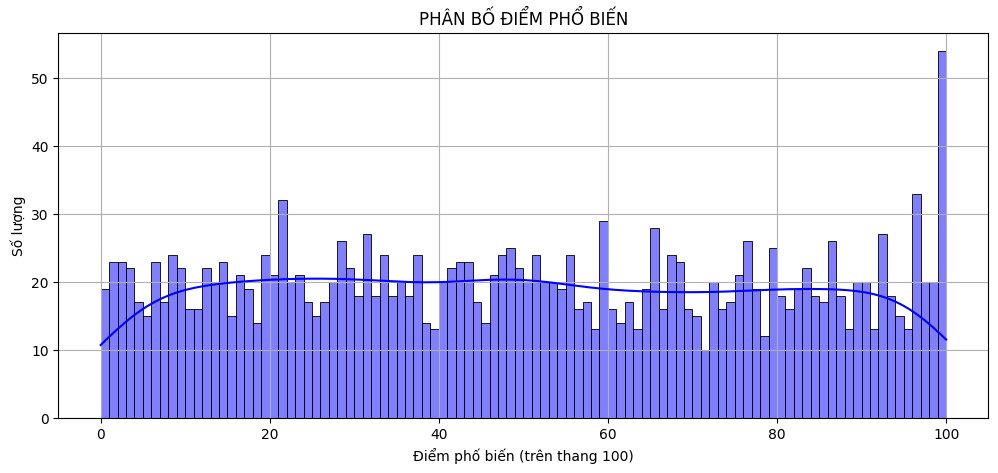

In [ ]:
plt.figure(figsize=(12, 5))
sb.histplot(df['popularity_score'], bins=100, kde=True, color='blue')
plt.title("PHÂN BỐ ĐIỂM PHỔ BIẾN")
plt.ylabel("Số lượng")
plt.xlabel("Điểm phố biến (trên thang 100)")
plt.grid(True)
plt.show()

f. Phân phối giá trị trong cột popularity_score có dạng như thế nào (bị lệch về một phía hay phân phối đều)?
-> Phân phối giá trị trong cột popularity_score dao động mạnh, nhìn chung phân bố đều có mọi nơi.

/var/folders/9l/vcv73kfd6nb59mbs7ylbd_1w0000gn/T/ipykernel_91133/2509011003.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='popularity_score', y='style', data=spring, palette='spring')
/var/folders/9l/vcv73kfd6nb59mbs7ylbd_1w0000gn/T/ipykernel_91133/2509011003.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='popularity_score', y='style', data=summer, palette='summer')
/var/folders/9l/vcv73kfd6nb59mbs7ylbd_1w0000gn/T/ipykernel_91133/2509011003.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='popularity_score', y='style', da

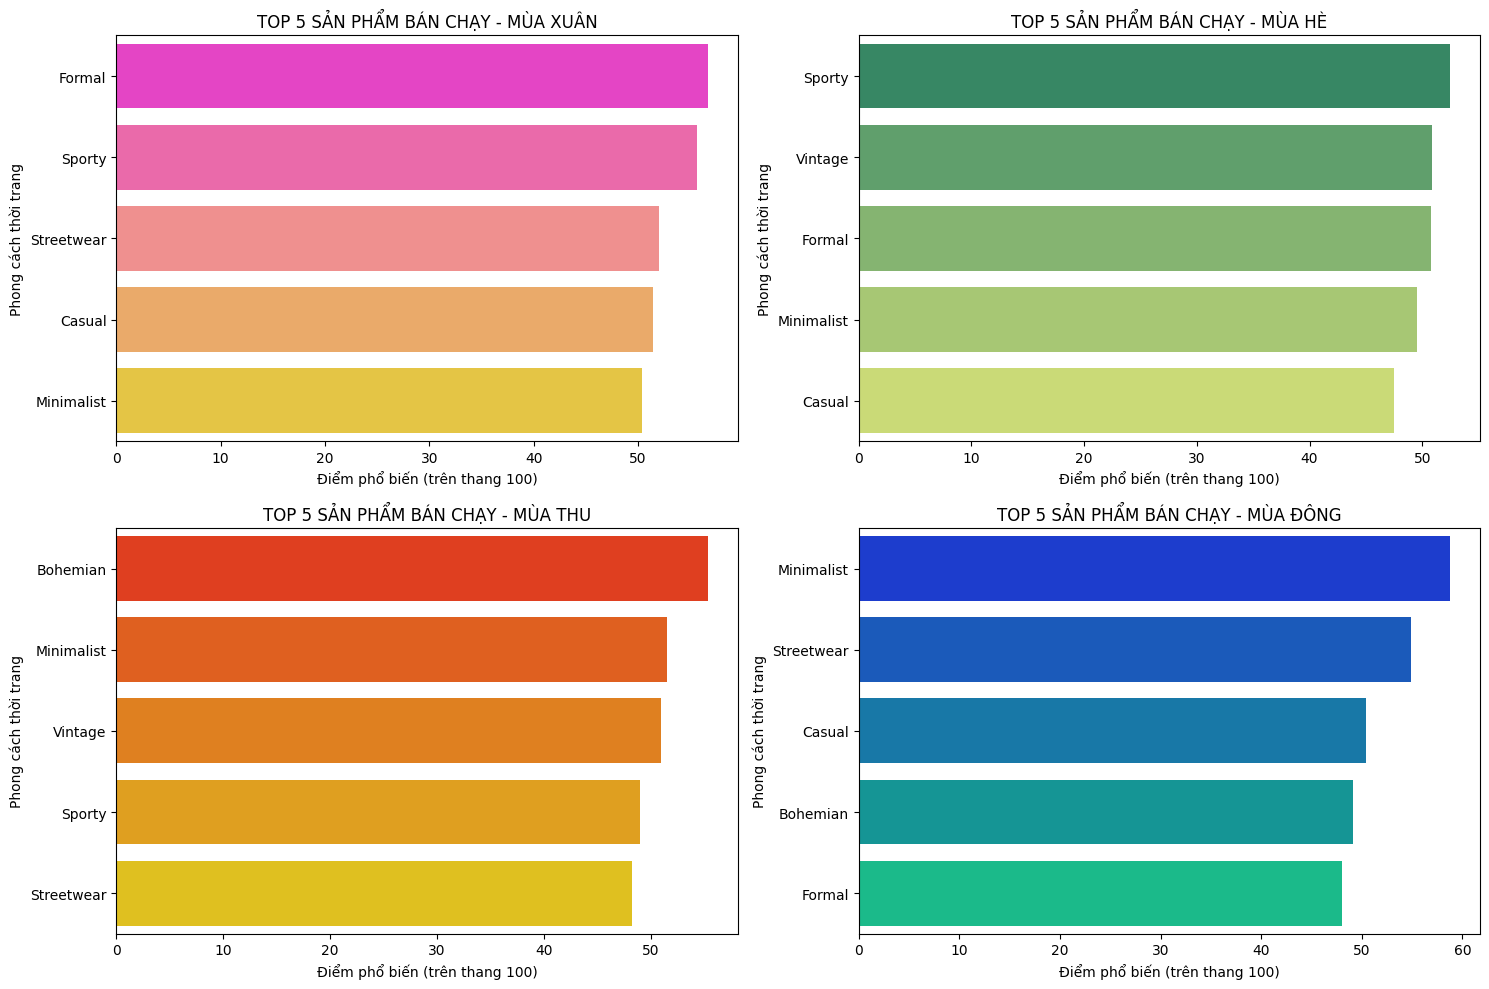

In [ ]:
plt.figure(figsize=(15, 10))

top_5_by_season = df.groupby(['season', 'style'])['popularity_score'].mean().groupby(level=0, group_keys=False).nlargest(5)
top_5_by_season = top_5_by_season.reset_index()

spring = top_5_by_season[top_5_by_season['season'] == 'Spring']
summer = top_5_by_season[top_5_by_season['season'] == 'Summer']
autumn = top_5_by_season[top_5_by_season['season'] == 'Autumn']
winter = top_5_by_season[top_5_by_season['season'] == 'Winter']

# Mùa xuân
plt.subplot(2, 2, 1)
sb.barplot(x='popularity_score', y='style', data=spring, palette='spring')
plt.title('TOP 5 SẢN PHẨM BÁN CHẠY - MÙA XUÂN')
plt.ylabel('Phong cách thời trang')
plt.xlabel('Điểm phổ biến (trên thang 100)')

# Mùa hè
plt.subplot(2, 2, 2)
sb.barplot(x='popularity_score', y='style', data=summer, palette='summer')
plt.title('TOP 5 SẢN PHẨM BÁN CHẠY - MÙA HÈ')
plt.ylabel('Phong cách thời trang')
plt.xlabel('Điểm phổ biến (trên thang 100)')

# Mùa thu
plt.subplot(2, 2, 3)
sb.barplot(x='popularity_score', y='style', data=autumn, palette='autumn')
plt.title('TOP 5 SẢN PHẨM BÁN CHẠY - MÙA THU')
plt.ylabel('Phong cách thời trang')
plt.xlabel('Điểm phổ biến (trên thang 100)')

# Mùa đông
plt.subplot(2, 2, 4)
sb.barplot(x='popularity_score', y='style', data=winter, palette='winter')
plt.title('TOP 5 SẢN PHẨM BÁN CHẠY - MÙA ĐÔNG')
plt.ylabel('Phong cách thời trang')
plt.xlabel('Điểm phổ biến (trên thang 100)')

plt.tight_layout()
plt.show()

3. Mối quan hệ giữa các yếu tố

a. Xu hướng thời trang có khác nhau theo từng mùa không? (Ví dụ: Mùa hè thường có phong cách nào phổ biến nhất?)
-> Xu hướng thời trang khác nhau theo từng mùa. Tuy nhiên, mùa xuân và mùa hè có xu hướng thời trang tương tự nhau, có thể thấy ở việc kiểu dáng formal và sporty cùng ở thứ hạng cao hoặc có đến 4/5 phong cách thời trang giống nhau. Điều tương tự cũng có thể thấy ở mùa thu và mùa đông khi có đến 3/5 phong cách thời trang trùng nhau.

In [ ]:
high_end_price = df.groupby("price_range")
for name, group in high_end_price:
    if name == "High-end":
        high_end_color = group.groupby("style").count()

high_end_color

,trend_id,category,popularity_score,season,color_palette,fabric_type,price_range,brand_influence,social_media_trend
style,,,,,,,,,
Bohemian,98,98,98,98,98,98,98,98,98
Casual,103,103,103,103,103,103,103,103,103
Formal,103,103,103,103,103,103,103,103,103
Minimalist,84,84,84,84,84,84,84,84,84
Sporty,93,93,93,93,93,93,93,93,93
Streetwear,82,82,82,82,82,82,82,82,82
Vintage,98,98,98,98,98,98,98,98,98


b. Phong cách thời trang nào thường xuất hiện với mức giá cao cấp (high-end) nhất?
-> Phong cách thời trang thường xuất hiện với mức giá cao cấp (high-end) nhất là casual và formal.

/var/folders/9l/vcv73kfd6nb59mbs7ylbd_1w0000gn/T/ipykernel_91133/3814279210.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=brand.values, y=brand.index, palette='Reds_r')


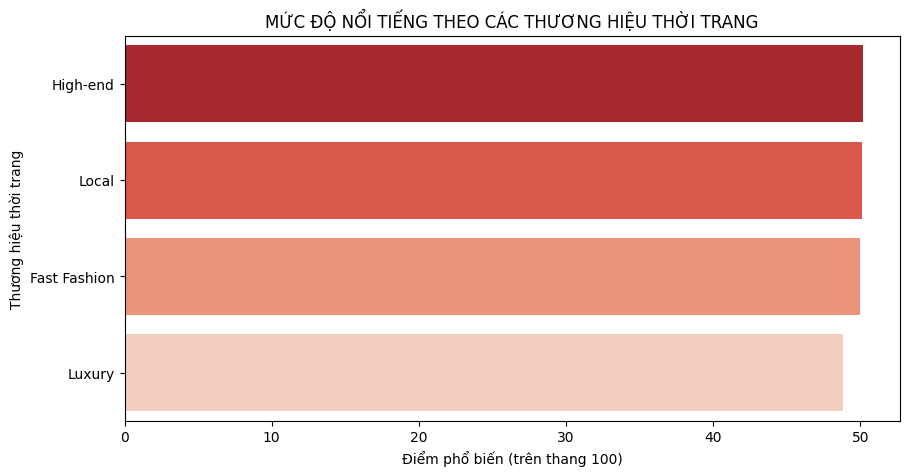

In [ ]:
brand = df.groupby("brand_influence")["popularity_score"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sb.barplot(x=brand.values, y=brand.index, palette='Reds_r')
plt.title("MỨC ĐỘ NỔI TIẾNG THEO CÁC THƯƠNG HIỆU THỜI TRANG")
plt.ylabel('Thương hiệu thời trang')
plt.xlabel('Điểm phổ biến (trên thang 100)')
plt.show()

c. Các thương hiệu có ảnh hưởng (brand_influence) tác động như thế nào đến độ phổ biến?
-> Các thương hiệu có ảnh hưởng không có tác động cụ thể đến độ nổi tiếng, vì như trên hình ta có thể thấy điểm trung bình của các thương hiệu gần như ngang nhau.

/var/folders/9l/vcv73kfd6nb59mbs7ylbd_1w0000gn/T/ipykernel_91133/2082987789.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='popularity_score', y='style', data=tiktok, palette='spring')
/var/folders/9l/vcv73kfd6nb59mbs7ylbd_1w0000gn/T/ipykernel_91133/2082987789.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='popularity_score', y='style', data=youtube, palette='summer')
/var/folders/9l/vcv73kfd6nb59mbs7ylbd_1w0000gn/T/ipykernel_91133/2082987789.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='popularity_score', y='style', d

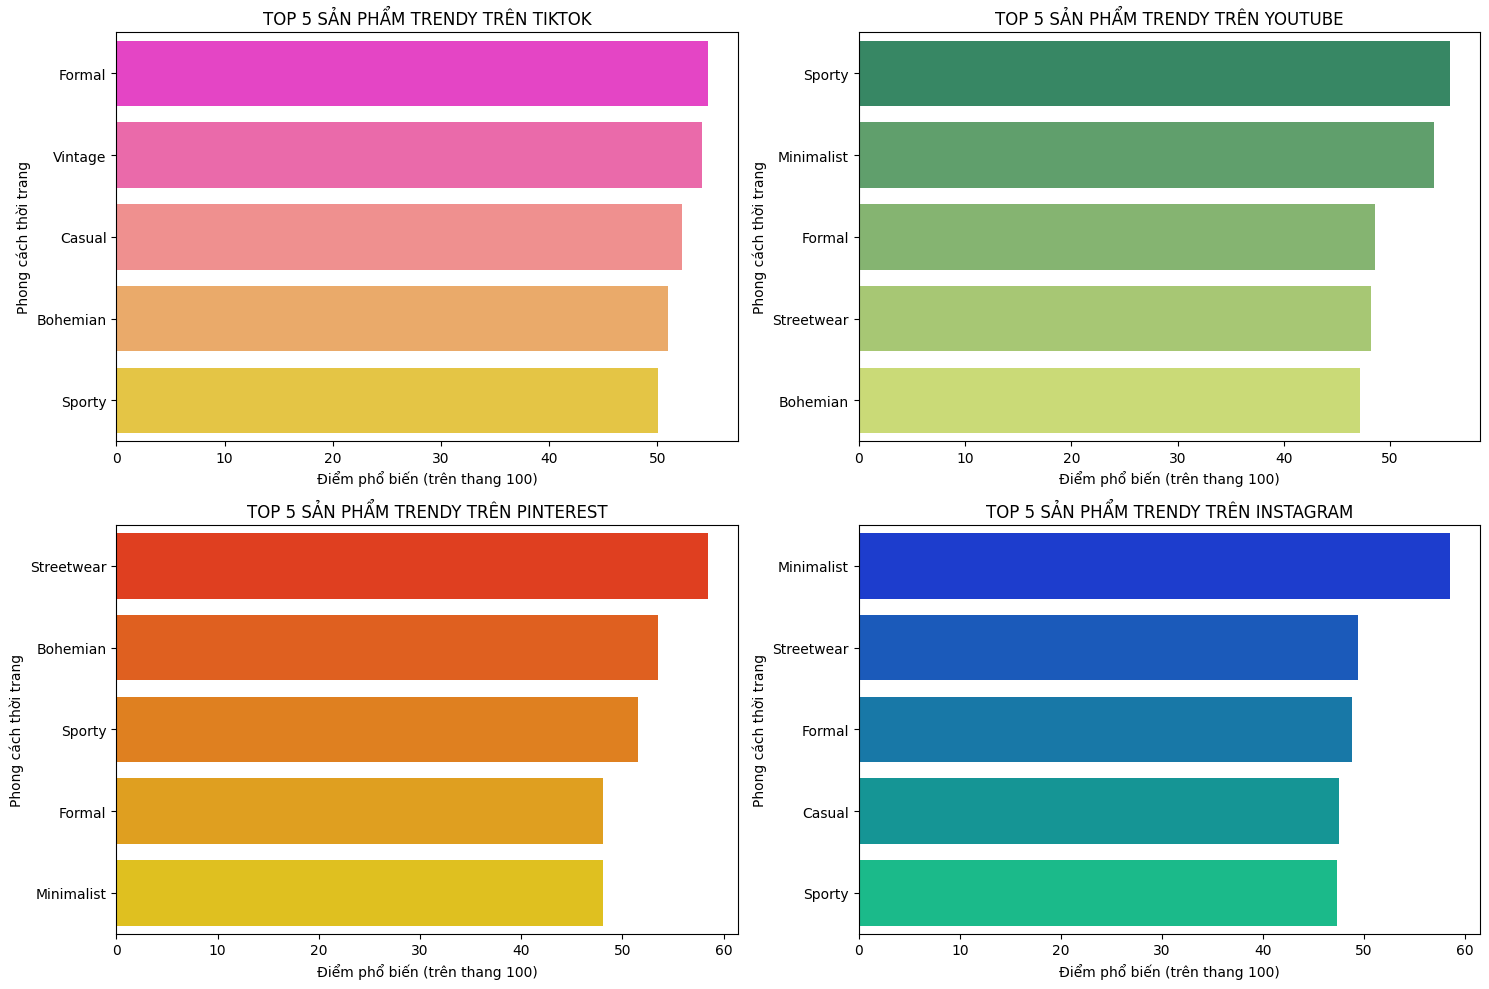

In [ ]:
plt.figure(figsize=(15, 10))

top_5_by_smt = df.groupby(['social_media_trend', 'style'])['popularity_score'].mean().groupby(level=0, group_keys=False).nlargest(5)
top_5_by_smt = top_5_by_smt.reset_index()

tiktok = top_5_by_smt[top_5_by_smt['social_media_trend'] == 'TikTok']
youtube = top_5_by_smt[top_5_by_smt['social_media_trend'] == 'YouTube']
pinterest = top_5_by_smt[top_5_by_smt['social_media_trend'] == 'Pinterest']
instagram = top_5_by_smt[top_5_by_smt['social_media_trend'] == 'Instagram']

plt.subplot(2, 2, 1)
sb.barplot(x='popularity_score', y='style', data=tiktok, palette='spring')
plt.title('TOP 5 SẢN PHẨM TRENDY TRÊN TIKTOK')
plt.ylabel('Phong cách thời trang')
plt.xlabel('Điểm phổ biến (trên thang 100)')

plt.subplot(2, 2, 2)
sb.barplot(x='popularity_score', y='style', data=youtube, palette='summer')
plt.title('TOP 5 SẢN PHẨM TRENDY TRÊN YOUTUBE')
plt.ylabel('Phong cách thời trang')
plt.xlabel('Điểm phổ biến (trên thang 100)')

plt.subplot(2, 2, 3)
sb.barplot(x='popularity_score', y='style', data=pinterest, palette='autumn')
plt.title('TOP 5 SẢN PHẨM TRENDY TRÊN PINTEREST')
plt.ylabel('Phong cách thời trang')
plt.xlabel('Điểm phổ biến (trên thang 100)')

plt.subplot(2, 2, 4)
sb.barplot(x='popularity_score', y='style', data=instagram, palette='winter')
plt.title('TOP 5 SẢN PHẨM TRENDY TRÊN INSTAGRAM')
plt.ylabel('Phong cách thời trang')
plt.xlabel('Điểm phổ biến (trên thang 100)')

plt.tight_layout()
plt.show()

3d. Những nền tảng mạng xã hội nào đang ảnh hưởng mạnh đến xu hướng thời trang?
-> Tiktok: có sự ổn định nhất giữa các nền tảng mạng xã hội khi không có sự phân hoá lớn nhưng vẫn đạt được mức độ phổ biến cao ở các kiểu mốt top đầu.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

palette = LinearSegmentedColormap.from_list("Pinks", [
    '#ff9900',
    '#ffcc00',
    '#ffd700',
    '#f0e68c',
    '#ffec8b',
    '#fffacd',
    '#ffffe0'
])

smt = sb.load_dataset('titanic')['class'].value_counts()
Pinks_r = [palette(i) for i in np.linspace(0, 1, len(smt))]

/var/folders/9l/vcv73kfd6nb59mbs7ylbd_1w0000gn/T/ipykernel_91133/1647733194.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='count', y='color_palette', data=data, ax=axes[i], palette=colors[i])
/var/folders/9l/vcv73kfd6nb59mbs7ylbd_1w0000gn/T/ipykernel_91133/1647733194.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='count', y='color_palette', data=data, ax=axes[i], palette=colors[i])
/var/folders/9l/vcv73kfd6nb59mbs7ylbd_1w0000gn/T/ipykernel_91133/1647733194.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='count', y='color

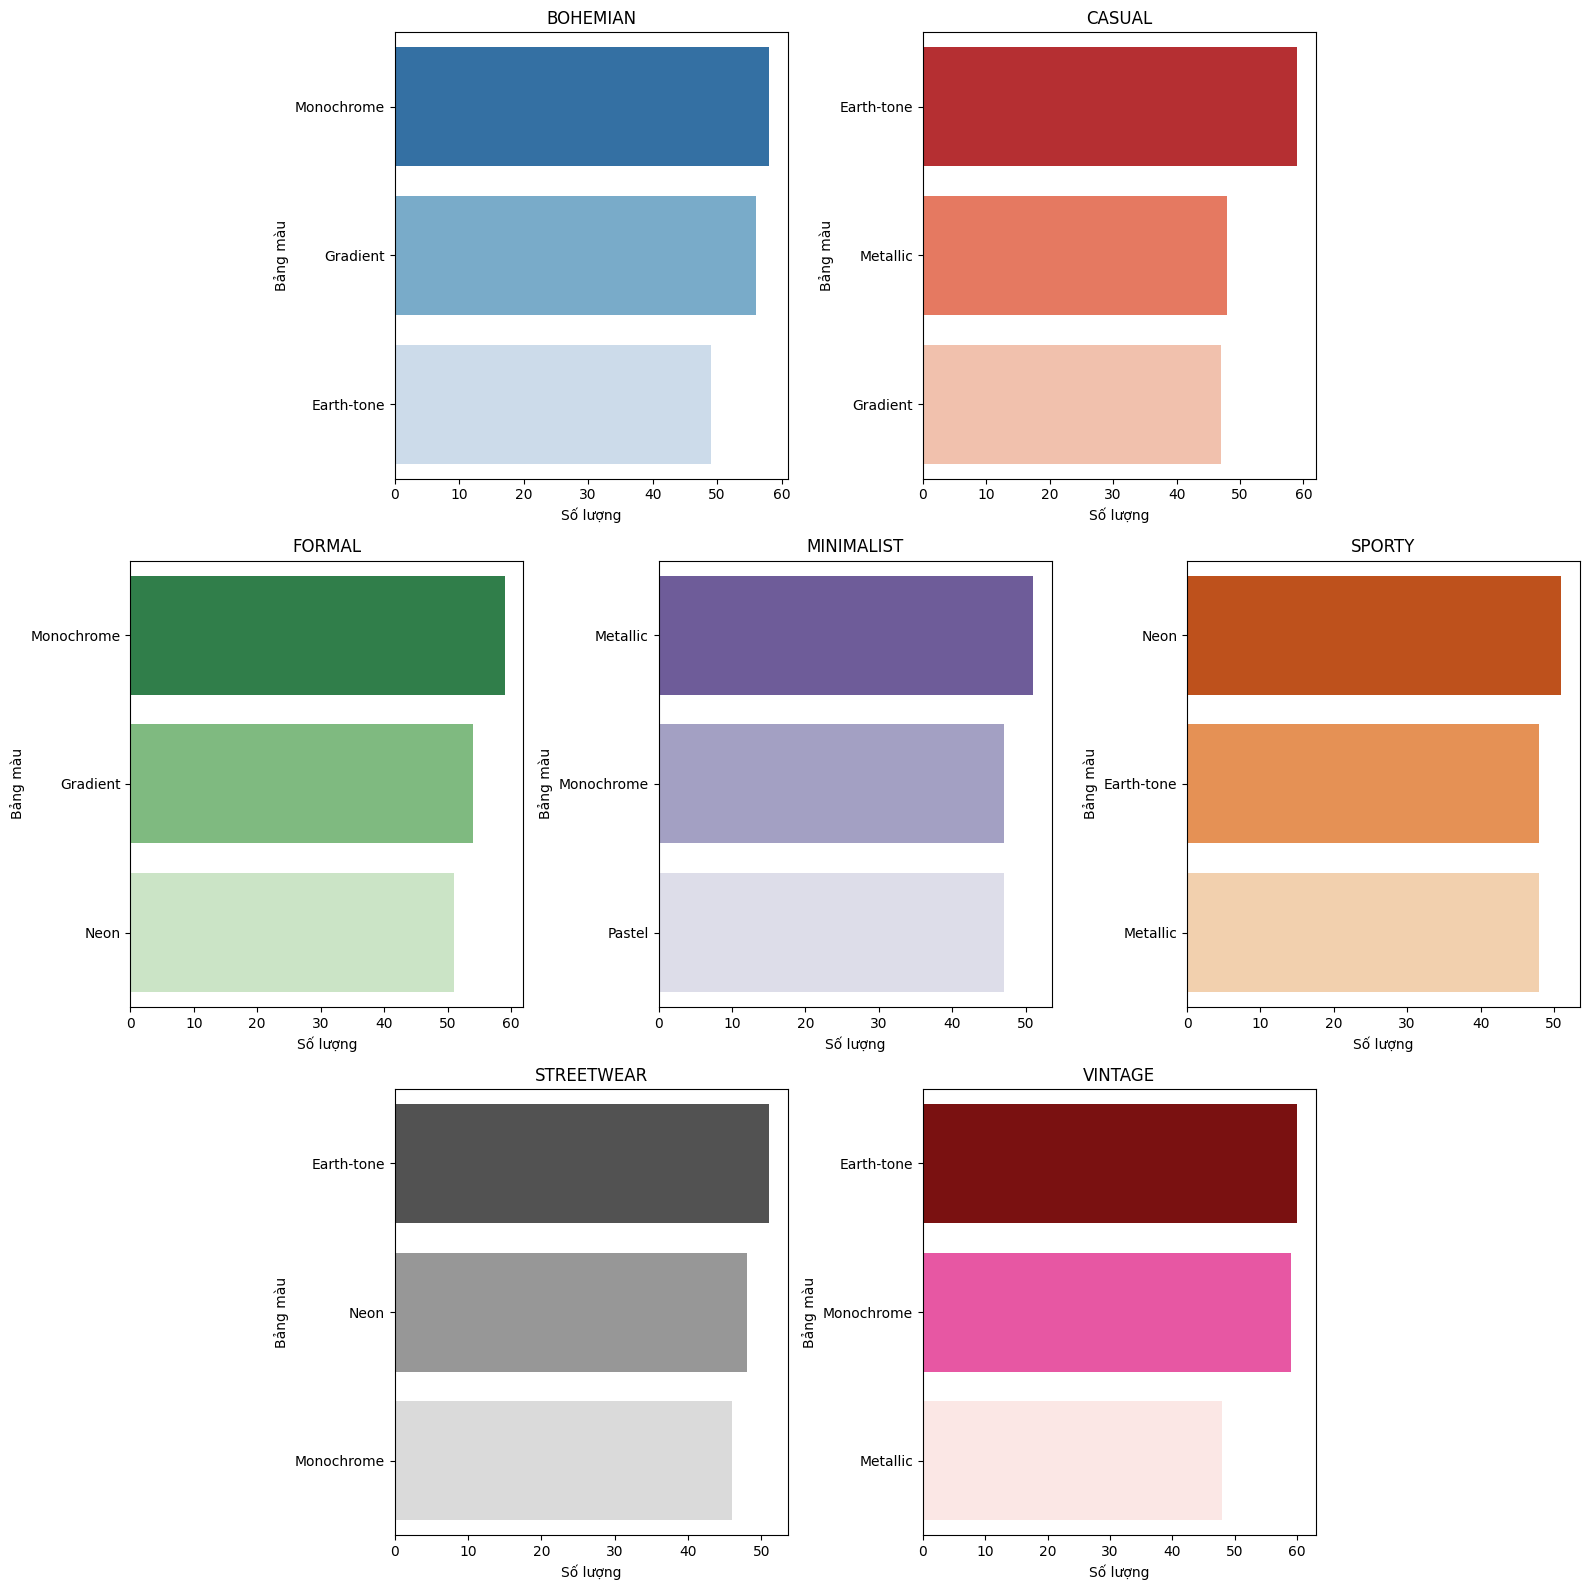

In [ ]:
fig = plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(6, 6)

# Hàng trên: 2 ô
ax1 = plt.subplot(gs[0:2, 1:3])
ax2 = plt.subplot(gs[0:2, 3:5])

# Hàng giữa: 3 ô
ax3 = plt.subplot(gs[2:4, 0:2])
ax4 = plt.subplot(gs[2:4, 2:4])
ax5 = plt.subplot(gs[2:4, 4:6])

# Hàng dưới: 2 ô
ax6 = plt.subplot(gs[4:6, 1:3])
ax7 = plt.subplot(gs[4:6, 3:5])

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]
style = ["Bohemian", "Casual", "Formal", "Minimalist", "Sporty", "Streetwear", "Vintage"]
colors = ["Blues_r", "Reds_r", "Greens_r", "Purples_r", "Oranges_r", "Greys_r", Pinks_r]

top_3_by_style = df.groupby(['style', 'color_palette']).count()
top_3_by_style = top_3_by_style.reset_index().iloc[:, :3]
top_3_by_style = top_3_by_style.rename(columns={"trend_id": "count"})
top_3_by_style = top_3_by_style.sort_values(['style', 'count'], ascending=[True, False])
top_3_by_style = top_3_by_style.groupby('style').head(3)

for i in range(7):
    data = top_3_by_style[top_3_by_style['style'] == style[i]]
    axes[i].set_title(style[i].upper())
    axes[i].set_ylabel('Bảng màu')
    axes[i].set_xlabel('Số lượng')
    sb.barplot(x='count', y='color_palette', data=data, ax=axes[i], palette=colors[i])

plt.tight_layout()
plt.show()

3e. Có sự khác biệt nào giữa các màu sắc được ưa chuộng theo từng phong cách thời trang không?
-> Có sự khác biệt giữa các màu sắc được ưa chuộng theo từng phong cách thời trang, tuy nhiên có hai bảng màu earth-tone và monochrome được yêu thích ở các phong cách (chiếm 5/7 phong cách thời trang).

4. Phân tích nâng cao

In [ ]:
style_smt = round(df.groupby(['style', 'social_media_trend'])['popularity_score'].mean(), 2)
style_smt = style_smt.reset_index()

smt_palette = ["#2A9D8F", "#E9C46A", "#F4A261", "#E76F51"]

plt.figure(figsize=(20, 14))
sb.barplot(data=style_smt, x='style', y='popularity_score', hue='social_media_trend', palette=smt_palette)

# Thêm tiêu đề và trục
plt.title('MỨC ĐỘ PHỔ BIẾN CỦA CÁC KIỂU MỐT TRÊN MẠNG XÃ HỘI')
plt.ylabel('Điểm phổ biến (trên thang 100)')
plt.xlabel('Phong cách thời trang')

# Hiển thị biểu đồ
plt.show()

NameError: name 'df' is not defined

a. Có xu hướng nào nổi bật trên nhiều nền tảng mạng xã hội cùng lúc không?
-> Formal, minimalist, sporty.

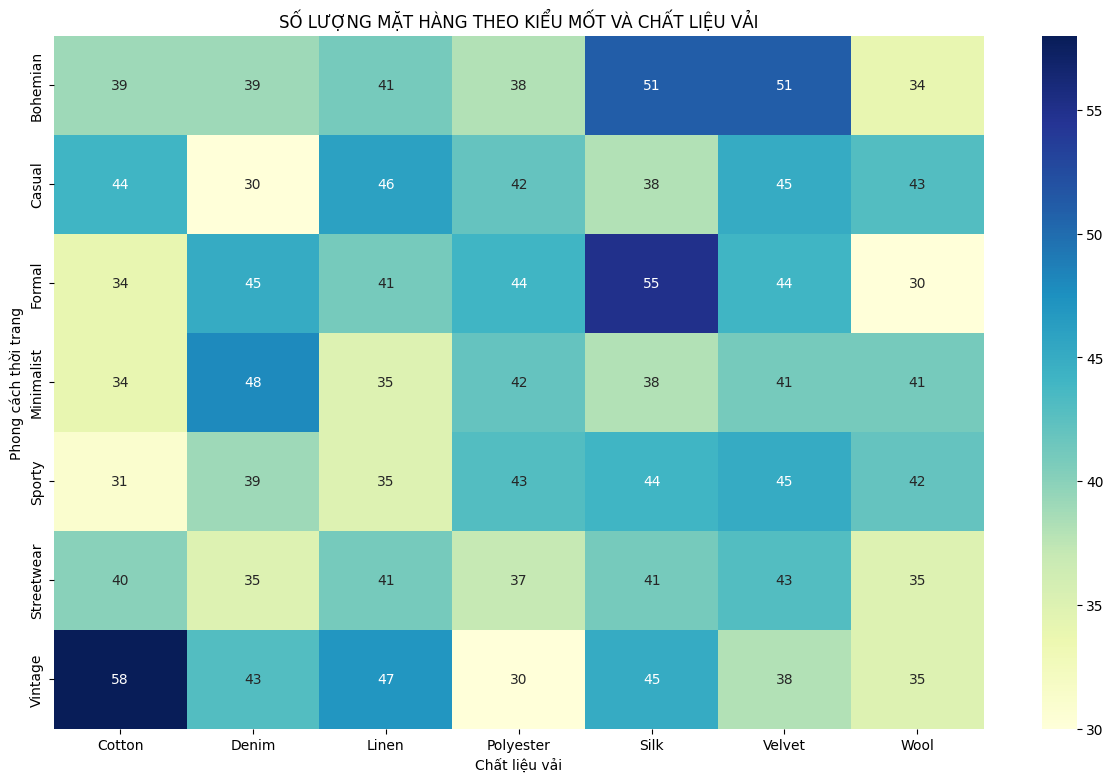

In [ ]:
fabric_style = df.groupby(['style', 'fabric_type']).count()
fabric_style = fabric_style.reset_index().iloc[:, :3]
fabric_style = fabric_style.rename(columns={"trend_id": "count"})
fabric_style = fabric_style.groupby(['style', 'fabric_type'])["count"].sum().unstack()

plt.figure(figsize=(15, 9))
sb.heatmap(fabric_style, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("SỐ LƯỢNG MẶT HÀNG THEO KIỂU MỐT VÀ CHẤT LIỆU VẢI")
plt.ylabel('Phong cách thời trang')
plt.xlabel('Chất liệu vải')
plt.show()

b. Những chất liệu vải nào thường gắn liền với các phong cách cụ thể?
-> Cotton: vintage; Silk: formal và bohemian; Velvet: bohemian.

c. Có mối tương quan nào giữa popularity_score và brand_influence không? (Giống với 3c)

d. Xu hướng thời trang có bị ảnh hưởng bởi season (mùa) không? (Giống với 3a)